# Linear Regression:

#### Steps :
          1. Design Model (input, Output_size, Forward Pass)
          2. Construct Loss & Optimizer
          3. Training Loop:
                       - Forward pass (comput prediction)
                       - backward pass (gradients)
                       - updates weights

In [44]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

## 1. Preparing Dataset:

In [47]:
# generating regression dataset
x_numpy, y_numpy = datasets.make_regression(n_samples= 100, n_features= 1, noise= 10, random_state= 1)

In [72]:
# converting arrays into tensor:

x = torch.from_numpy(x_numpy.astype(np.float32))

y = torch.from_numpy(y_numpy.astype(np.float32))


In [76]:
# reshaping y:
y = y.view(y.shape[0], 1)
y

tensor([[ -52.4569],
        [ -15.3944],
        [  31.0930],
        [  81.2992],
        [ 133.5014],
        [  31.8811],
        [  37.2071],
        [ -40.0318],
        [-106.1755],
        [  24.6391],
        [ -48.5005],
        [ -20.1805],
        [ -92.0735],
        [  54.5579],
        [ -88.0327],
        [  67.2478],
        [  -9.8930],
        [ -41.9358],
        [ -59.7349],
        [ -70.5248],
        [ -26.7745],
        [ 177.6170],
        [  67.4657],
        [  21.3366],
        [ -24.7716],
        [ -48.3415],
        [   2.4783],
        [  45.8005],
        [ 108.5522],
        [ -62.7538],
        [ -27.0635],
        [ -66.2615],
        [  16.8885],
        [  72.8929],
        [  92.4590],
        [ -31.7070],
        [ -42.0576],
        [ 158.7180],
        [-189.1667],
        [  71.8265],
        [ 167.5173],
        [ 111.5039],
        [ -69.3254],
        [ -64.8109],
        [ -33.7991],
        [  72.3437],
        [  26.9415],
        [  85

In [78]:
# separating number of sample & number of features
n_sample, n_feature = x.shape

In [80]:
n_sample, n_feature

(100, 1)

In [82]:
no_input_features = n_feature
no_input_features

1

# Model:

In [85]:
# In Linear case it is just single layer so we can use direct method

model = nn.Linear(no_input_features, 1)   # give params are no_input_features & output

In [87]:
# important paramters:

Learning_rate = 0.01
epochs = 100

# loss function:
criterion = nn.MSELoss()

# Optimizer:
optimizer = torch.optim.SGD(model.parameters(), lr= Learning_rate)

### Traning Loop:

In [90]:
for epoch in range(epochs):

    # forward pass
    y_pred = model(x)

    # loss
    loss = criterion(y_pred, y)

    # backwaord pass
    loss.backward()

    # weight update:
    optimizer.step

    # clear grad
    optimizer.zero_grad()

    if (epoch+1) % 10 ==0:
        print( f'Epoch: {epoch+1}, Loss: {loss.item():.4f}')
    

Epoch: 10, Loss: 5423.4438
Epoch: 20, Loss: 5423.4438
Epoch: 30, Loss: 5423.4438
Epoch: 40, Loss: 5423.4438
Epoch: 50, Loss: 5423.4438
Epoch: 60, Loss: 5423.4438
Epoch: 70, Loss: 5423.4438
Epoch: 80, Loss: 5423.4438
Epoch: 90, Loss: 5423.4438
Epoch: 100, Loss: 5423.4438


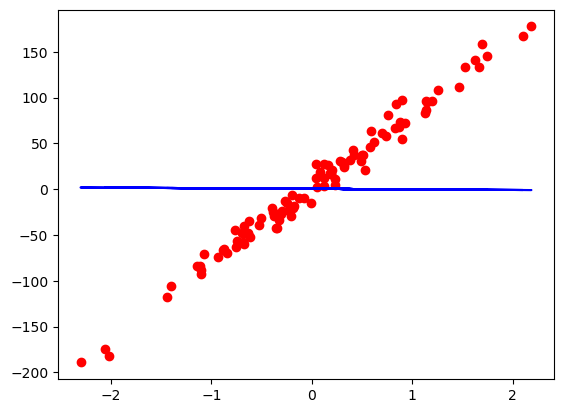

In [93]:
# plot

predicted = model(x).detach().numpy()

plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')
plt.show()